In [59]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px

In [60]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures 
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, make_scorer
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor, PoissonRegressor, QuantileRegressor
from sklearn.linear_model import TheilSenRegressor, TweedieRegressor, RANSACRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import ARDRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor  # decision tree 앙상블 배깅
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor # decision tree 앙상블 부스팅
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn import datasets
import calendar
import warnings
warnings.filterwarnings(action = "ignore")

In [61]:
# windows matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf" # 폰트 파일 
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# minus 관련 warning
plt.rcParams['axes.unicode_minus'] = False

In [66]:
plt.style.use(["dark_background"])

In [67]:
total_covid_data = pd.read_csv("./data/2018_covid_eco.csv")

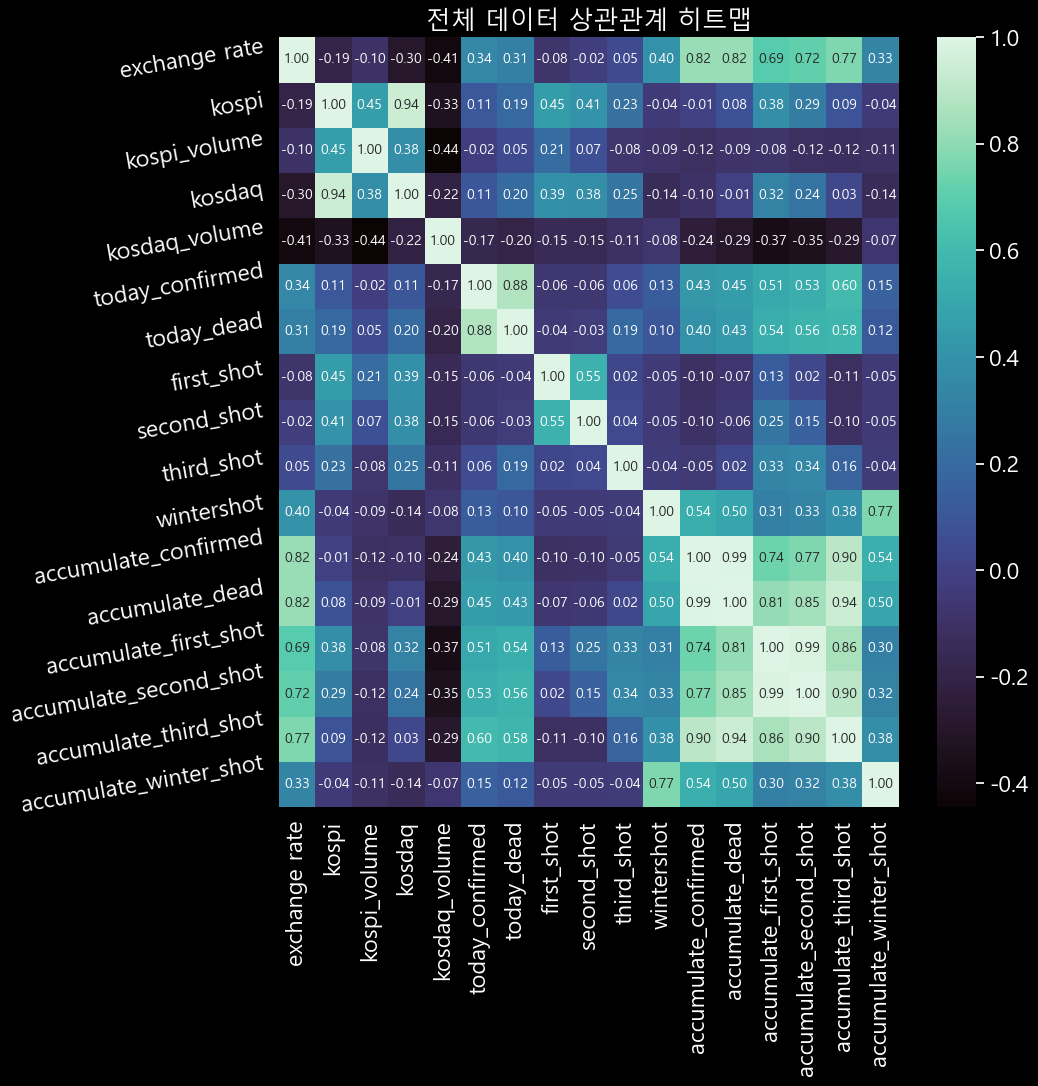

In [69]:
plt.figure(figsize = (10, 10))

sns.heatmap(total_covid_data.drop("date", axis = 1).corr(),
            annot = True,
            fmt = ".2f",
            cmap = "mako",
            annot_kws={"size": 10})

plt.title("전체 데이터 상관관계 히트맵")
plt.yticks(rotation = 10)

plt.show()

# today_confirmed(일일 코로나 확진자)

- today_dead(일일 사망자) 컬럼만 0.88의 높은 상관관계를 보임
- 코로나 백신 누적 컬럼과는 낮지만 어느정도의 상관관계가 있는 것으로 판단
- 경제 데이터(코스피, 코스닥, 환율) 데이터 중에서는 환율 데이터만 0.34정도 
  낮지만 확인해 볼 필요가 있어보임

# vaccine 관련 컬럼

- 1,2차 백신 데이터는 코스피와 0.45 / 0.41 정도의 낮지만 상관이 있어보임
- 1,2차 백신 데이터는 코스닥과 0.39 / 0.38 정도의 낮지만 상관이 있어보임

# exchange rate(환율)

- 코로나 누적 확진자 / 코로나 누적 사망자와 0.82의 높은 상관을 보임
- 백신 1,2,3차 누적 접종률과 0.69/0.72/0.77의 상관을 보임
- 코로나 일일 확진자 / 사망자와 0.34/0.31의 낮은 상관을 보임

# 경제 데이터 시각화

In [23]:
fig = px.line(total_covid_data,
              x = "date",
              y = total_covid_data.columns,
              title = "전체 데이터 꺽은선 그래프")

fig.show()

- 코스피와 코스닥 그래프는 비슷한 변동 추이를 보이나 환률과는 다름

In [41]:
def regressor(df_X, df_y):
    from sklearn.linear_model import LinearRegression # 선형 회귀
    from sklearn.linear_model import Ridge, Lasso, ElasticNet # norm 규제 회귀
    from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
    from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor # decision tree 앙상블 배깅
    from xgboost import XGBRegressor # decision tree 앙상블 부스팅
    from lightgbm import LGBMRegressor
    from catboost import CatBoostRegressor
    from sklearn.model_selection import cross_val_score # model 검증
    
    import ast # convert string to function
    import numpy as np
    from tqdm import tqdm
    
    linear = LinearRegression()
    ridge, lasso, elasticnet = Ridge(), Lasso(), ElasticNet()
    ardr_linear, baysian_ridge = ARDRegression(), BayesianRidge()
    random_forest = RandomForestRegressor()
    extra_tree, adaboost = ExtraTreesRegressor(), AdaBoostRegressor()
    xgboost_linear = XGBRegressor()
    lightgbm_linear = LGBMRegressor()
    catboost_linear = CatBoostRegressor(verbose = False)
    
    model_list = ["linear", "ridge", "lasso", "elasticnet",
                  "ardr_linear", "baysian_ridge", 
                  "random_forest", "extra_tree", "adaboost",
                  "xgboost_linear", "lightgbm_linear", "catboost_linear"]
    
    score_dic = dict()
    for model_nm in tqdm(model_list):
        scores = cross_val_score(eval(model_nm), df_X, df_y, scoring = "neg_mean_squared_error")
        # cv default = 5
        rmse_score = np.sqrt(-scores)
        rmse_sm = rmse_score.mean()
        score_dic[model_nm] = rmse_sm
    
    score_dic = sorted(score_dic.items(), key = lambda t : t[1])
    
    return score_dic

In [75]:
x1 = total_covid_data.drop(["date", "today_confirmed"], axis = 1)
y1 = total_covid_data["today_confirmed"]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,
                                                    test_size = .2, random_state = 486)

scaled_train1 = ss.fit_transform(x1_train)
scaled_test1 = ss.transform(x1_test)

In [76]:
el = ElasticNet()
el.fit(scaled_train1, y1_train)

ElasticNet()

In [77]:
el.score(scaled_test1, y1_test)

0.7033992045651344

In [78]:
pred = el.predict(scaled_train1)
pred

array([-7.33807804e+01, -2.82751563e+02,  6.57245507e+04, ...,
        4.76498475e+02, -6.37380479e+02, -3.84386029e+01])

In [80]:
y1_train

578         0.0
587         0.0
1797    46547.0
1247      677.0
1224      463.0
         ...   
1377     1594.0
1415     3184.0
314         0.0
628         0.0
900        67.0
Name: today_confirmed, Length: 1460, dtype: float64

In [81]:
y1_pred = el.predict(scaled_test1)
y1_pred

array([ 8.07572410e+02,  1.26294057e+04,  6.20248584e+04,  7.90692633e+04,
        1.67123536e+03, -1.15197317e+02, -2.08309872e+02,  6.59529588e+04,
        9.98216011e+02,  4.57165143e+04,  1.05696799e+03,  3.85362495e+02,
        3.64778450e+02,  4.22853273e+04,  3.89134344e+02,  4.95363937e+04,
       -4.86081445e+02,  9.35135248e+02,  2.15029195e+02,  7.85718740e+02,
        4.13103379e+04,  9.89842554e+02,  1.58374652e+05,  5.57472876e+02,
       -6.57466626e+00,  3.67112862e+02, -5.20107059e+02, -1.12771763e+02,
        6.09042357e+04,  3.50260121e+02,  1.71458172e+05, -4.93773156e+02,
        3.23996338e+02, -7.93341965e+02,  2.39886388e+02,  3.55510354e+04,
        5.50765684e+02,  6.87423584e+02,  1.14217619e+03, -1.77081338e+03,
        5.23211372e+04,  3.22851570e+03,  2.92865178e+03, -9.27589289e+01,
        2.92744949e+02,  5.44855290e+02,  3.98398893e+02,  5.17215337e+03,
        1.92180251e+02,  1.12234256e+05,  1.08386958e+03,  1.71414051e+03,
        4.32385013e+04, -

In [82]:
# 타겟 값, 예측 값 시각화
hist_data = [y1_test, y1_pred]

labels = ["y_test", "y_pred"]

fig = ff.create_distplot(hist_data, labels, show_hist = False, show_rug = False)
fig.show()

In [85]:
total_covid_data1 = total_covid_data[1:].reset_index(drop = True)
total_covid_data1["target"] = total_covid_data[:-1]["kospi"]
total_covid_data1.head()

,date,exchange rate,kospi,kospi_volume,kosdaq,kosdaq_volume,today_confirmed,today_dead,first_shot,second_shot,third_shot,wintershot,accumulate_confirmed,accumulate_dead,accumulate_first_shot,accumulate_second_shot,accumulate_third_shot,accumulate_winter_shot,target
0,2018-01-03,1062.540039,2486.350098,331100.0,822.309998,1203100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2479.649902
1,2018-01-04,1063.939941,2466.459961,333800.0,808.010010,1346500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2486.350098
2,2018-01-05,1061.079956,2497.520020,308800.0,828.030029,1229200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2466.459961
3,2018-01-06,1061.079956,2497.520020,308800.0,828.030029,1229200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2497.520020
4,2018-01-07,1061.079956,2497.520020,308800.0,828.030029,1229200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2497.520020


In [88]:
x2 = total_covid_data1.drop(["date", "target"], axis = 1)
y2 = total_covid_data1["target"]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2,
                                                    test_size = .2, random_state = 486)

scaled_train2 = ss.fit_transform(x2_train)
scaled_test2 = ss.transform(x2_test)

In [89]:
regressor(scaled_train2, y2_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:18<00:00,  1.52s/it]


[('baysian_ridge', 21.8108049567009),
 ('linear', 21.81217769293721),
 ('ridge', 21.832668485870414),
 ('ardr_linear', 21.83576824868685),
 ('lasso', 21.84165425534936),
 ('extra_tree', 23.067334327574024),
 ('random_forest', 24.17907014542349),
 ('catboost_linear', 24.19983996140656),
 ('lightgbm_linear', 24.253325134222898),
 ('xgboost_linear', 25.29637197235128),
 ('adaboost', 30.12806321037221),
 ('elasticnet', 95.64984271136863)]

In [90]:
ext1 = ExtraTreesRegressor()
ext1.fit(scaled_train2, y2_train)

ExtraTreesRegressor()

In [91]:
ext1.score(scaled_test2, y2_test)

0.9958303230763943

In [92]:
pred1 = ext1.predict(scaled_train2)
pred1

array([2004.53332533, 1942.290039  , 2434.330078  , ..., 2080.439941  ,
       2091.52002   , 2141.320068  ])

In [93]:
y2_train

578     1998.130005
587     1942.290039
1796    2434.330078
1729    2223.860107
1223    3197.199951
           ...     
1377    2956.300049
1415    2962.419922
314     2080.439941
628     2091.520020
900     2141.320068
Name: target, Length: 1459, dtype: float64

In [96]:
y2_pred = ext1.predict(scaled_test2)
y2_pred

array([2094.28300556, 2956.98731948, 2451.34808073, 3117.0987062 ,
       2366.65960449, 2065.97614453, 3255.41414561, 2368.4986185 ,
       2342.92952546, 3078.29141843, 2416.30631324, 1936.78030019,
       2177.78467262, 2338.71696796, 2090.2299805 , 2492.5161781 ,
       2474.3149415 , 2139.83800438, 2407.5288865 , 2302.88246344,
       2663.03888438, 2081.43313654, 3235.13714103, 2278.9399415 ,
       2128.14559181, 2440.8489782 , 2469.3490561 , 2416.76001   ,
       2604.1682933 , 3140.03170169, 2706.9883962 , 2106.47066539,
       2272.870117  , 2123.68954795, 2707.10335681, 3199.67606675,
       2267.52002   , 2150.704956  , 2200.88374227, 3292.8672241 ,
       2481.93572498, 2620.89044056, 2416.6292112 , 2347.5250245 ,
       2339.29721364, 2247.08201915, 2086.49882223, 3087.15555193,
       2182.00831524, 2873.71428464, 3023.63486343, 2558.85176519,
       2664.7068602 , 2458.31961527, 2763.16385773, 2285.48543518,
       2153.29546643, 2482.14211895, 2153.54814386, 2728.62899

In [97]:
# 타겟 값, 예측 값 시각화
hist_data = [y2_test, y2_pred]

labels = ["y2_test", "y2_pred"]

fig = ff.create_distplot(hist_data, labels, show_hist = False, show_rug = False)
fig.show()

In [104]:
total_covid_data.columns

Index(['date', 'exchange rate', 'kospi', 'kospi_volume', 'kosdaq',
       'kosdaq_volume', 'today_confirmed', 'today_dead', 'first_shot',
       'second_shot', 'third_shot', 'wintershot', 'accumulate_confirmed',
       'accumulate_dead', 'accumulate_first_shot', 'accumulate_second_shot',
       'accumulate_third_shot', 'accumulate_winter_shot'],
      dtype='object')

In [108]:
# 다중공선성 확인
model1 = sm.OLS.from_formula("y ~ kospi_volume + kosdaq + kosdaq_volume + today_confirmed + today_dead + first_shot + second_shot + third_shot + wintershot + accumulate_confirmed + accumulate_confirmed + accumulate_confirmed + accumulate_second_shot + accumulate_third_shot + accumulate_winter_shot", data = total_covid_data)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1673.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:54:47   Log-Likelihood:                -11160.
No. Observations:                1825   AIC:                         2.235e+04
Df Residuals:                    1811   BIC:                         2.243e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                265

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
total_covid_data_1 = total_covid_data.drop(["date"], axis = 1)

In [114]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(total_covid_data_1.values, i) for i in range(total_covid_data_1.shape[1])]
vif["features"] = total_covid_data_1.columns 

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,1213.387751,accumulate_dead
1,698.710833,accumulate_confirmed
2,645.402096,kospi
3,477.352326,kosdaq
4,200.154194,accumulate_second_shot
5,185.421697,accumulate_first_shot
6,84.373484,exchange rate
7,73.671749,accumulate_third_shot
8,9.133615,kospi_volume
9,7.306566,today_confirmed


In [115]:
total_covid_data.head()

,date,exchange rate,kospi,kospi_volume,kosdaq,kosdaq_volume,today_confirmed,today_dead,first_shot,second_shot,third_shot,wintershot,accumulate_confirmed,accumulate_dead,accumulate_first_shot,accumulate_second_shot,accumulate_third_shot,accumulate_winter_shot
0,2018-01-02,1065.219971,2479.649902,262200.0,812.450012,989200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-03,1062.540039,2486.350098,331100.0,822.309998,1203100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-04,1063.939941,2466.459961,333800.0,808.010010,1346500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-05,1061.079956,2497.520020,308800.0,828.030029,1229200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-06,1061.079956,2497.520020,308800.0,828.030029,1229200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 누적 데이터들 제거

In [116]:
re_total_covid_data = total_covid_data.drop(["accumulate_confirmed", "accumulate_dead", "accumulate_first_shot", "accumulate_second_shot", "accumulate_third_shot", "accumulate_winter_shot"], axis = 1)

In [117]:
re_total_covid_data 

,date,exchange rate,kospi,kospi_volume,kosdaq,kosdaq_volume,today_confirmed,today_dead,first_shot,second_shot,third_shot,wintershot
0,2018-01-02,1065.219971,2479.649902,262200.0,812.450012,989200.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-03,1062.540039,2486.350098,331100.0,822.309998,1203100.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-04,1063.939941,2466.459961,333800.0,808.010010,1346500.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-05,1061.079956,2497.520020,308800.0,828.030029,1229200.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-06,1061.079956,2497.520020,308800.0,828.030029,1229200.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2022-12-27,1275.130005,2332.790039,448300.0,704.190002,900.0,87576.0,50.0,252.0,261.0,0.0,77169.0
1821,2022-12-28,1272.280029,2280.449951,405700.0,692.369995,800.0,87491.0,69.0,261.0,302.0,0.0,69296.0
1822,2022-12-29,1274.319946,2236.399902,361000.0,679.289978,1000.0,71402.0,76.0,249.0,284.0,0.0,72120.0
1823,2022-12-30,1260.260010,2236.399902,361000.0,679.289978,1000.0,65201.0,68.0,330.0,392.0,0.0,81364.0


In [118]:
x3 = re_total_covid_data.drop(["date", "kospi"], axis = 1)
y3 = re_total_covid_data["kospi"]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3,
                                                    test_size = .2, random_state = 855)

In [119]:
ss = StandardScaler()
scaled_train3 = ss.fit_transform(x3_train)
scaled_test3 = ss.transform(x3_test)

In [120]:
regressor(scaled_train3, y3_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:14<00:00,  1.21s/it]


[('extra_tree', 24.99500070643477),
 ('catboost_linear', 26.741396438247477),
 ('random_forest', 28.272842361874204),
 ('xgboost_linear', 32.926747680206745),
 ('lightgbm_linear', 33.613465719135164),
 ('adaboost', 69.5152388775546),
 ('linear', 110.7569690824045),
 ('ridge', 110.75808089645577),
 ('baysian_ridge', 110.75873716361077),
 ('lasso', 110.8506139389174),
 ('ardr_linear', 111.08712577965858),
 ('elasticnet', 157.47558379552297)]

In [121]:
ext3 = ExtraTreesRegressor()
ext3.fit(scaled_train3, y3_train)

ExtraTreesRegressor()

In [122]:
ext3.score(scaled_test3, y3_test)

0.997523885902158

In [123]:
pred = ext3.predict(scaled_train3)
pred

array([2676.76001 , 2301.98999 , 2140.669922, ..., 2460.649902,
       2105.620117, 2370.969971])

In [125]:
y3_train

1517    2676.760010
195     2301.989990
452     2140.669922
1666    2412.959961
9       2487.909912
           ...     
1506    2729.679932
581     1917.500000
137     2460.649902
708     2105.620117
1659    2370.969971
Name: kospi, Length: 1460, dtype: float64

In [126]:
y3_pred = ext3.predict(scaled_test3)
y3_pred

array([2199.72467048, 2956.87329104, 2806.860107  , 2492.77361102,
       2581.78369873, 2137.439941  , 2386.7080909 , 2176.459961  ,
       2467.67640847, 2094.31485828, 2451.52002   , 2049.929932  ,
       2755.37910169, 2101.959961  , 3240.25885754, 3008.53918722,
       2077.10010501, 1725.43414144, 2009.130005  , 2714.9153761 ,
       2488.42770978, 2850.60062498, 3054.27989244, 2087.43239731,
       2092.399902  , 3194.21060059, 2413.90431125, 2502.49671403,
       2238.51823003, 2096.        , 3150.43399925, 2294.98999   ,
       2061.48999   , 2343.9358375 , 1560.17300025, 3153.9529005 ,
       2304.49337641, 2708.58800062, 2583.86718489, 2497.16394525,
       2039.96619022, 2054.2868726 , 2629.84634989, 2959.66268794,
       2719.86958261, 2024.37850943, 2030.18128902, 2311.65926487,
       3010.901111  , 2052.520072  , 3182.05808822, 2501.42032954,
       2019.06478789, 2206.15621367, 2492.399902  , 2460.800049  ,
       2058.52267563, 2345.82285126, 2997.01298606, 1789.35677

In [128]:
# 타겟 값, 예측 값 시각화
hist_data = [y3_test, y3_pred]

labels = ["y3_test", "y3_pred"]

fig = ff.create_distplot(hist_data, labels, show_hist = False, show_rug = False)
fig.show()

# 코스피, 코스닥 컬럼 제거

In [130]:
new_total_covid_data = re_total_covid_data.drop(["kospi", "kosdaq"], axis = 1)
new_total_covid_data

,date,exchange rate,kospi_volume,kosdaq_volume,today_confirmed,today_dead,first_shot,second_shot,third_shot,wintershot
0,2018-01-02,1065.219971,262200.0,989200.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-03,1062.540039,331100.0,1203100.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-04,1063.939941,333800.0,1346500.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-05,1061.079956,308800.0,1229200.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-06,1061.079956,308800.0,1229200.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1820,2022-12-27,1275.130005,448300.0,900.0,87576.0,50.0,252.0,261.0,0.0,77169.0
1821,2022-12-28,1272.280029,405700.0,800.0,87491.0,69.0,261.0,302.0,0.0,69296.0
1822,2022-12-29,1274.319946,361000.0,1000.0,71402.0,76.0,249.0,284.0,0.0,72120.0
1823,2022-12-30,1260.260010,361000.0,1000.0,65201.0,68.0,330.0,392.0,0.0,81364.0


In [131]:
x4 = new_total_covid_data.drop(["date", "exchange rate"], axis = 1)
y4 = new_total_covid_data["exchange rate"]

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4,
                                                    test_size = .2, random_state = 855)

ss = StandardScaler()
scaled_train4 = ss.fit_transform(x4_train)
scaled_test4 = ss.transform(x4_test)

In [132]:
regressor(scaled_train4, y4_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:11<00:00,  1.02it/s]


[('extra_tree', 25.033014372055817),
 ('catboost_linear', 26.161124740632868),
 ('random_forest', 26.831205955756143),
 ('xgboost_linear', 27.48086122571121),
 ('lightgbm_linear', 28.184999419318228),
 ('adaboost', 37.31789408857608),
 ('lasso', 57.48287295265747),
 ('baysian_ridge', 57.48390033665154),
 ('ridge', 57.504986833935256),
 ('linear', 57.50780894857953),
 ('ardr_linear', 57.512268450445546),
 ('elasticnet', 59.69611582455538)]

In [133]:
ext4 = ExtraTreesRegressor()
ext4.fit(scaled_train4, y4_train)

ExtraTreesRegressor()

In [134]:
ext4.score(scaled_test4, y4_test)

0.9105854057909396

In [135]:
y4_pred = ext4.predict(scaled_test4)
y4_pred

array([1114.3300294 , 1186.60449827, 1102.37662699, 1307.94120116,
       1142.96608151, 1133.069946  , 1153.91348868, 1157.150024  ,
       1331.96468616, 1132.55949005, 1080.079956  , 1198.630005  ,
       1233.47549809, 1175.22998   , 1119.26591195, 1168.88421262,
       1161.00939201, 1226.19957553, 1196.        , 1220.98701047,
       1155.91361311, 1190.12811645, 1109.32587891, 1135.80851563,
       1127.        , 1113.79599612, 1193.8000901 , 1312.48988766,
       1121.6867982 , 1129.050049  , 1163.29921397, 1123.150024  ,
       1120.030029  , 1375.82709098, 1193.94088254, 1160.24180791,
       1141.6530041 , 1226.01000856, 1221.16941298, 1069.35679552,
       1127.48977896, 1195.76001   , 1222.34601075, 1186.7108033 ,
       1238.27459348, 1194.56470469, 1113.0697276 , 1128.89491955,
       1174.93951054, 1156.9401635 , 1123.20651856, 1167.74379257,
       1215.82679923, 1161.51365951, 1076.790039  , 1079.22998   ,
       1120.78190379, 1356.02399771, 1177.93381714, 1179.29308

In [136]:
# 타겟 값, 예측 값 시각화
hist_data = [y4_test, y4_pred]

labels = ["y4_test", "y4_pred"]

fig = ff.create_distplot(hist_data, labels, show_hist = False, show_rug = False)
fig.show()

In [137]:
results1 = sm.OLS(y4_pred, sm.add_constant(y4_test)).fit()

In [138]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     3700.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          1.84e-192
Time:                        15:57:28   Log-Likelihood:                -1659.4
No. Observations:                 365   AIC:                             3323.
Df Residuals:                     363   BIC:                             3331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           110.2399     17.668      6.240      0.000      75.496     144.984
exchange rate     0.9063      0.015     60.826      0.000       0.877       0.936
==============================================================================
Omnibus:                       51.274   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.969
Skew:                          -0.283   Prob(JB):                     8.31e-78
Kurtosis:                       7.798   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""